In [100]:
your_name = "Myles Sartor"
your_uid = "119017708"

# Assignment 03: JSON and API Data Manipulation

## Course: INST447 - Data Sources and Manipulation

### Learning Objectives
In this assignment, you will practice:
- Parsing and navigating nested JSON structures
- Flattening JSON data into pandas DataFrames using `json_normalize`
- Making API calls and handling responses
- Implementing responsible API usage practices (rate limiting)
- Reproducing visualizations for exploratory data analysis
- Using AI tools effectively for data analysis

### Dataset: UMD Course Data

Many of you may have already been using PlanetTerp to check course information, let's see how we can programmatically access data hosted on PlanetTerp. We'll work with its data sources:

1. **JSON file from GitHub**: All UMD courses from Fall 2019 (5.7 MB, 4,582 courses)
   - Source: [umdio/umdio-data](https://github.com/umdio/umdio-data)
   - Direct link: https://raw.githubusercontent.com/umdio/umdio-data/refs/heads/master/courses/data/201908.json
   
2. **PlanetTerp API**: Grade data, professor ratings, and course information
   - API Documentation: https://planetterp.com/api/
   - Base URL: `https://planetterp.com/api/v1`
   - Optional: Download [OpenAPI specification](https://planetterp.com/api/openapi.yaml) for AI coding assistants (Cursor, Claude Code, etc.)

### Note on AI Assistance
You are **encouraged** to use AI assistants (ChatGPT, Claude, Copilot, etc.) to help you complete Questions 1-5. Learning to effectively use AI tools for coding is a valuable skill. In Question 6, you'll reflect on how you used these tools and what you learned.

**Tip for AI coding tools:** If you're using Cursor or Claude Code, you can download the OpenAPI specification from PlanetTerp and include it in your project. These tools can read the specification to understand the API endpoints directly!

---

## Setup: Load Libraries and Data

In [98]:
import json
import pandas as pd
import requests
import time
import matplotlib.pyplot as plt
import numpy as np

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [99]:
# Load the course data from Fall 2019
# Data source: https://raw.githubusercontent.com/umdio/umdio-data/refs/heads/master/courses/data/201908.json

print("Loading course data from Fall 2019...")

# Option 1: Load from URL (recommended - always gets fresh data)
response = requests.get('https://raw.githubusercontent.com/umdio/umdio-data/refs/heads/master/courses/data/201908.json')
courses = response.json()

# Option 2: Load from local file (if you downloaded it)
# with open('201908.json') as f:
#     courses = json.load(f)

print(f"✓ Successfully loaded {len(courses)} courses from Fall 2019")
print(f"\nEach course has these top-level fields: {list(courses[0].keys())}")
print(f"\nExample course ID: {courses[0]['course_id']}")
print(f"Example course name: {courses[0]['name']}")

# Tip for finding a specific course:
# for course in courses:
#     if course['course_id'] == 'INST447':
#         # Found it! Now you can work with this course
#         break

Loading course data from Fall 2019...
✓ Successfully loaded 4582 courses from Fall 2019

Each course has these top-level fields: ['course_id', 'semester', 'name', 'dept_id', 'department', 'credits', 'description', 'grading_method', 'gen_ed', 'core', 'relationships', 'sections']

Example course ID: AASP100
Example course name: Introduction to African American Studies


---

## Question 1: Parsing Nested JSON to Find INST447 Details (20 points)

Let's practice navigating JSON structure by finding information about INST447 (our course!).

The JSON structure has multiple levels:
- **Top level**: List of course objects
- **Course level**: Contains `course_id`, `name`, `description`, `sections`, etc.
- **Sections level**: Each course has a list of sections
- **Meetings level**: Each section has a list of meeting times

**Your task** is to extract and display the following information of INST447:
1. Course name and description
2. Number of credits
3. Prerequisites
4. Number of sections offered
5. For EACH section, display:
   - Section number
   - Instructor name(s)
   - Meeting days and times (from the meetings list)
   - Building and room
   - Total seats and open seats

**Expected output format:**
```
INST447: Data Sources and Manipulation

Description: [full description text]

Credits: 3
Prerequisites: [prerequisite text]

Sections offered: 2

Section 0101:
  Instructor: Yla Tausczik
  Meeting: TuTh 12:30pm-1:45pm
  Location: VMH 1203
  Capacity: 50 seats (0 open)

Section 0102:
  [similar format]
```

In [97]:
# YOUR CODE HERE

inst447_course = None # set course to inst447
for course in courses:
    if course['course_id'] == 'INST447':
        inst447_course = course
        break

if inst447_course: # course information 
    course_id = inst447_course['course_id']
    course_name = inst447_course['name']
    description = inst447_course.get('description', 'No description available')
    credits = inst447_course.get('credits', 'N/A')
    
    # prereqs
    prerequisites = "None" # set none if no prereqs are found
    relationships = inst447_course.get('relationships', []) # get relations if they exist, else return empty list
    if relationships and isinstance(relationships, list): # if relationships param exists as an instance of a list of dicts
        for relation in relationships:
            if isinstance(relation, dict) and relation.get('type') == 'prereq': # if relation in relationships is dict and has prereq value
                prerequisites = relation.get('value', 'None') # get prereq value in dictionary 
   
    
    
    sections = inst447_course.get('sections', []) # get sections if they exist, else return empty list 
    
    # course information shown
    print(f"{course_id}: {course_name}\n")
    print(f"Description: {description}\n")
    print(f"Credits: {credits}")
    print(f"Prerequisites: {prerequisites}\n")
    print(f"Sections offered: {len(sections)}\n")
    
    # section details
    for section in sections:
        section_number = section.get('number', 'N/A') # get section number else not applicable
        instructors = section.get('instructors', []) # get instructors else empty list
        instructor_names = ", ".join(instructors) if instructors else "Not assigned" # show instructors in list joined together by commas + whitespace if they exist
        
        # meeting info
        meetings = section.get('meetings', []) # get meetings else empty list
        meeting_info = "No meeting times" # initialized base value
        location = "No location" # initialized base value 
        
        if meetings: # if meetings exist 
            meeting = meetings[0]  # first meeting
            days = meeting.get('days', '') # get days meeting else empty string
            start_time = meeting.get('start_time', '') # get start time else empty string
            end_time = meeting.get('end_time', '') # get ending time else empty string 
            building = meeting.get('building', '') # get building else empty string
            room = meeting.get('room', '') # get room else empty string 
            
            
            if start_time and end_time: # if there exists a start and end time 
                meeting_info = f"{days} {start_time}-{end_time}" # formatting meeting time period
            else:
                meeting_info = f"{days} TBA" # if there is not strat and end time print to be announced 
                
            location = f"{building} {room}".strip() if building or room else "TBA" # set location to building and room else TBA
        
        
        seats = section.get('seats', 0) # get seats else set as 0
        open_seats = section.get('open_seats', 0) # get open seats else set as 0 if there are none
        
        print(f"Section {section_number}:")
        print(f"  Instructor: {instructor_names}")
        print(f"  Meeting: {meeting_info}")
        print(f"  Location: {location}")
        print(f"  Capacity: {seats} seats ({open_seats} open)")
        print() # printed in correct format for each section in list
else:
    print("INST447 not found in the course list")

    
 

INST447: Data Sources and Manipulation

Description: Examines approaches to locating, acquiring, manipulating, and disseminating data. Imperfection, biases, and other problems in data are examined, and methods for identifying and correcting such problems are introduced. The course covers other topics such as automated collection of large data sets, and extracting, transforming, and reformatting a variety of data and file types.

Credits: 3
Prerequisites: None

Sections offered: 2

Section 0101:
  Instructor: Yla Tausczik
  Meeting: TuTh 12:30pm-1:45pm
  Location: VMH 1203
  Capacity: 50 seats (0 open)

Section 0102:
  Instructor: Donal Heidenblad, William Bowser
  Meeting:  TBA
  Location: ONLINE
  Capacity: 50 seats (5 open)



---

## Question 2: Flattening Nested JSON with json_normalize (20 points)

**Motivation:** Most data analysis requires flat tables, but real-world data often comes in nested formats. The `json_normalize()` function is a powerful pandas tool for flattening nested JSON. `json_normalize` is like "exploding" nested lists into separate rows. For example:

**Input JSON:**
```python
[
    {"name": "INST447", "sections": [{"num": "0101"}, {"num": "0102"}]},
    {"name": "INST326", "sections": [{"num": "0101"}]}
]
```

**After flattening with `json_normalize`:**
```
   name      num
0  INST447   0101
1  INST447   0102
2  INST326   0101
```

Notice how:
- Each section becomes its own row
- The parent information (course name) is repeated for each section
- We go from 2 courses to 3 rows (one per section)

### Your Task:

Your task is to extract all the sections of INST courses in Fall 2019, though section information is nested in courses in the json structure. You want to create a DataFrame where:
- **Each row represents one section** (not one course)
- The row should include information from the parent course (like `course_id`, `name`, `credits`, `dept_id`)
- The row should also include information from the section itself (like `section_id`, `seats`, `instructors`, etc.)

**Steps:**

1. Filter the `courses` list to only INST courses (`dept_id == 'INST'`)

2. Use `pd.json_normalize()` to flatten this nested structure
   - **Hint:** Think about which part of the JSON is the "nested list" you want to explode
   - **Hint:** Think about which fields from the parent course you want to keep in each row

3. Display:
   - The shape of the resulting DataFrame (rows, columns)
   - The column names
   - The first 10 rows
   - Total number of INST sections offered in Fall 2019
   - Total number of seats offered across all INST sections

In [96]:
# YOUR CODE HERE

# INST courses only
inst_courses = [course for course in courses if course.get('dept_id') == 'INST'] # get course for course in list of courses if course is INST

print(f"{len(inst_courses)} INST courses")


if inst_courses:
   
    inst_sections = pd.json_normalize( # flatten
        inst_courses,
        record_path='sections',  # exploding nested sections list
        meta=[
            'course_id', 
            'name',  # parent course fields
            'credits', 
            'dept_id',
            'description'
        ],  
        errors='ignore'
    )

    # display 
    print(f"Shape of DataFrame: {inst_sections.shape}")
    print(f"Number of columns: {len(inst_sections.columns)}")
    print(f"Column names: {list(inst_sections.columns)}")
    print(f"\nTotal INST sections offered in Fall 2019: {len(inst_sections)}")

    # total seats
    if 'seats' in inst_sections.columns:
        total_seats = inst_sections['seats'].sum()
        print(f"Total seats offered across all INST sections: {total_seats}")
    else:
        print("'seats' column not found in the DataFrame")
        total_seats = 0

    display(inst_sections.head(10))
else:
    print("No INST courses found!")





68 INST courses
Shape of DataFrame: (136, 14)
Number of columns: 14
Column names: ['course', 'section_id', 'semester', 'number', 'seats', 'meetings', 'open_seats', 'waitlist', 'instructors', 'course_id', 'name', 'credits', 'dept_id', 'description']

Total INST sections offered in Fall 2019: 136
Total seats offered across all INST sections: 506050501507810010010050204050454545404550505040505050405050505050505040485050504550505050503850509050504540505050404040404085050505040100405050404040304025303025303038401010101010303015151213303030253535351055555535352525251090303028302055554225510520


,course,section_id,semester,number,seats,meetings,open_seats,waitlist,instructors,course_id,name,credits,dept_id,description
0,INST126,INST126-0101,201908,0101,50,"[{'days': 'MWF', 'room': '1113', 'building': '...",8,0,[Edward Summers],INST126,Introduction to Programming for Information Sc...,3,INST,An introduction to computer programming for st...
1,INST126,INST126-0102,201908,0102,60,"[{'days': 'TuTh', 'room': '2106', 'building': ...",8,0,[Jean-Paul Togbe],INST126,Introduction to Programming for Information Sc...,3,INST,An introduction to computer programming for st...
2,INST126,INST126-0103,201908,0103,50,"[{'days': 'TuTh', 'room': '1101', 'building': ...",17,0,[Aric Bills],INST126,Introduction to Programming for Information Sc...,3,INST,An introduction to computer programming for st...
3,INST126,INST126-0104,201908,0104,50,"[{'days': '', 'room': 'ONLINE', 'building': ''...",2,0,[Amanda Lazar],INST126,Introduction to Programming for Information Sc...,3,INST,An introduction to computer programming for st...
4,INST152,INST152-0103,201908,0103,150,"[{'days': 'TuTh', 'room': '0126', 'building': ...",78,0,[Ursula Gorham-Oscilowski],INST152,"""Fake Checking"": Battling Misinformation and D...",3,INST,"Examining the phenomenon of ""fake news"" using ..."
5,INST154,INST154-0101,201908,0101,78,"[{'days': 'TuTh', 'room': '2212', 'building': ...",3,0,[Douglas Oard],INST154,Apollo at 50,3,INST,"Examines Apollo mission, one of the greatest e..."
6,INST201,INST201-0101,201908,0101,100,"[{'days': 'TuTh', 'room': '1120', 'building': ...",0,0,[Sarah Gilbert],INST201,Introduction to Information Science,3,INST,Examining the effects of new information techn...
7,INST201,INST201-0102,201908,0102,100,"[{'days': 'M', 'room': '1120', 'building': 'SQ...",1,0,[Lee Lipscomb],INST201,Introduction to Information Science,3,INST,Examining the effects of new information techn...
8,INST201,INST201-0103,201908,0103,100,"[{'days': 'TuTh', 'room': '0117', 'building': ...",4,0,[Laria Rogers],INST201,Introduction to Information Science,3,INST,Examining the effects of new information techn...
9,INST201,INST201-0105,201908,0105,50,"[{'days': '', 'room': 'ONLINE', 'building': ''...",0,0,[Ryan O'Grady],INST201,Introduction to Information Science,3,INST,Examining the effects of new information techn...


---

## Question 3: Making a Single API Call to Get INST447 Info (10 points)

### PlanetTerp API

PlanetTerp offers an API that lets us programmatically access course information, professor ratings, and grade distributions. Check out the [API documentation](https://planetterp.com/api/) to see what endpoints are available and what data they return.

- **Base URL**: `https://planetterp.com/api/v1`
- **Documentation**: https://planetterp.com/api/

### Your Task:

Use the PlanetTerp API's `/course` endpoint to get information about **INST447**.

Extract and display:
- Course title and department
- Number of credits
- Average GPA (if available - it might be None!)
- Number of professors who have taught this course
- Names of the first 5 professors

**Hints:**
- Review the API documentation to understand what parameters the `/course` endpoint expects
- Use the `requests` library to make the API call
- Remember to parse the JSON response with `.json()`
- Check if `average_gpa` is None before trying to format it!

In [95]:
# YOUR CODE HERE

# API call to PlanetTerp
base_url = "https://planetterp.com/api/v1"
course_endpoint = f"{base_url}/course"

params = {
    'name': 'INST447'
}

try:
    response = requests.get(course_endpoint, params=params)
    
    if response.status_code == 200: # if response query is ok
        course_data = response.json() # parsing out JSON response 
        
        # get API info, else not applicable or empty list returned (since there can be more than one professor for a given course)
        title = course_data.get('title', 'N/A')
        department = course_data.get('department', 'N/A')
        credits = course_data.get('credits', 'N/A')
        average_gpa = course_data.get('average_gpa', 'N/A')
        professors = course_data.get('professors', [])
        
        # display details of API info 
        print(f"Course Title: {title}")
        print(f"Department: {department}")
        print(f"Credits: {credits}")
        print(f"Average GPA: {average_gpa if average_gpa else 'Not available'}") # display average gpa if it exists and isn't none else not available
        print(f"Number of professors who taught this course: {len(professors)}")
        
        if professors: # if professors exist for course
            print("First 5 professors:")
            for i, prof in enumerate(professors[:5], 1): # loop through first 5 professors 
                print(f"  {i}. {prof}")
        else:
            print("No professor information available")
            
    else:
        print(f"Request failed: {response.status_code}")
        print(f"Response: {response.text}")
        
except Exception as e:
    print(f"Error making request: {e}")

Course Title: Data Sources and Manipulation
Department: INST
Credits: 3
Average GPA: 3.3570779712339136
Number of professors who taught this course: 33
First 5 professors:
  1. Donal Heidenblad
  2. Yla Tausczik
  3. William Bowser
  4. Sydney Triola
  5. William Farmer


---

## Question 4: Multiple API Calls - Comparing INST 4xx Grades (20 points)

**Motivation:** Which senior-level INST course has the best grades? Let's use the PlanetTerp API to find out!

### IMPORTANT: API Etiquette and Rate Limiting

When making multiple API calls, **ALWAYS** include a delay between requests. This is both respectful to the API server and helps you avoid hitting rate limits that many APIs impose.

**Common delay strategies:**
```python
import time

# Simple fixed delay (most common)
time.sleep(1)  # Wait 1 second between requests

# Exponential backoff (for more robust applications)
time.sleep(2 ** attempt)  # Wait 1s, 2s, 4s, 8s... on retries
```

For this assignment, a simple 1-second delay between requests is sufficient. **You will lose points if you don't include delays!**

### Your Task:

Compare grade distributions for these INST 4xx courses in **Spring 2024 (semester code: 202401)**:
- INST414 (Data Science Techniques)
- INST447 (Data Sources and Manipulation)
- INST462 (Introduction to Data Visualization)
- INST466 (Technology, Culture, and Society)

For each course:
1. Call the `/grades` endpoint with appropriate parameters for the course and semester

2. **Use `time.sleep(1)` between API calls!**

3. Aggregate grades across all sections (one course may have multiple sections)

4. Calculate for each course:
   - Total number of students
   - Percentage of A-range grades (A+, A, A-)
   - Percentage of B-range grades (B+, B, B-)
   - Percentage of C-range or below (C+, C, C-, D+, D, D-, F)
   - Withdrawal rate (W)

5. Create a summary comparing all 4 courses

6. Interpret the results - what do you observe about grade distributions across these courses?

**Hints:**
- Check the API documentation for the `/grades` endpoint parameters
- The API returns a list of grade records (one per section)
- You'll need to aggregate across multiple sections for each course

In [94]:
# YOUR CODE HERE


courses_to_analyze = ['INST414', 'INST447', 'INST462', 'INST466']
semester = '202401'  # SP2024

# grade ranges to use later
a_grades = ['A+', 'A', 'A-']
b_grades = ['B+', 'B', 'B-']
low_grades = ['C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']

results = [] # list to append to later

for course in courses_to_analyze:
    print(f"{course}:")
    
    # API call to grades endpoint
    grades_endpoint = f"{base_url}/grades"
    params = {
        'course': course,
        'semester': semester
    }
    
    try:
        response = requests.get(grades_endpoint, params=params)
        
        if response.status_code == 200: # ok response query after requesting data from API
            grade_data = response.json() # parsing out JSON response 
            
            
            if not grade_data: # no grade data comes back then
                print(f"No grade data available for {course} in {semester}")
                results.append({
                    'course': course,
                    'total_students': 0,
                    'a_percent': 0,
                    'b_percent': 0,
                    'c_below_percent': 0,
                    'w_percent': 0
                })
                continue
            
            # aggregate grades across all sections
            total_students = 0
            grade_counts = {}
            
            for section in grade_data: # iterate through each section in grade data
                for grade, count in section.items(): # iterate through each key-value pair in section dict
                    if grade not in ['course', 'professor', 'section', 'semester', 'year']: # filtering out fields not associated with grade counts
                        grade_counts[grade] = grade_counts.get(grade, 0) + count # get count if it exists (else 0) and add it to the current count before updating dict total
                        total_students += count # add grade count to the total number of students 
            
            if total_students > 0:
                
                # counts converted to percents using student totals
                a_count = sum(grade_counts.get(grade, 0) for grade in a_grades)
                b_count = sum(grade_counts.get(grade, 0) for grade in b_grades)
                low_count = sum(grade_counts.get(grade, 0) for grade in low_grades)
                w_count = grade_counts.get('W', 0)
                
                a_percent = (a_count / total_students) * 100
                b_percent = (b_count / total_students) * 100
                c_below_percent = (low_count / total_students) * 100
                w_percent = (w_count / total_students) * 100
                
                results.append({ # add results to list 
                    'course': course,
                    'total_students': total_students,
                    'a_percent': a_percent,
                    'b_percent': b_percent,
                    'c_below_percent': c_below_percent,
                    'w_percent': w_percent
                })
                
                print(f"Data for {total_students} students")
            else:
                print(f"No students in grade data")
                results.append({
                    'course': course,
                    'total_students': 0,
                    'a_percent': 0,
                    'b_percent': 0,
                    'c_below_percent': 0,
                    'w_percent': 0
                })
                
        else:
            print(f"API request failed for {course} (Status: {response.status_code})")
            results.append({
                'course': course,
                'total_students': 0,
                'a_percent': 0,
                'b_percent': 0,
                'c_below_percent': 0,
                'w_percent': 0
            })
            
    except Exception as e:
        print(f" Error for {course}: {e}")
        results.append({
            'course': course,
            'total_students': 0,
            'a_percent': 0,
            'b_percent': 0,
            'c_below_percent': 0,
            'w_percent': 0
        })
    
    # rate limit (1 second between requests)
    time.sleep(1)

# summary
if results:
    summary_df = pd.DataFrame(results)
    display(summary_df)

    for result in results: # for each course's grade information added to results list
        if result['total_students'] > 0:
            print(f"{result['course']}: {result['total_students']} students")
            print(f"A-range: {result['a_percent']:.2f}%")
            print(f"B-range: {result['b_percent']:.2f}%")
            print(f"C-range or below: {result['c_below_percent']:.2f}%")
            print(f"Withdrawal rate: {result['w_percent']:.2f}%")
            print()
        else:
            print(f"{result['course']}: No data")
else:
    print("No results")



INST414:
Data for 133 students
INST447:
Data for 129 students
INST462:
Data for 271 students
INST466:
Data for 152 students


,course,total_students,a_percent,b_percent,c_below_percent,w_percent
0,INST414,133,63.909774,18.796992,14.285714,1.503759
1,INST447,129,72.868217,17.054264,6.976744,3.100775
2,INST462,271,78.597786,13.653137,6.642066,1.107011
3,INST466,152,76.973684,16.447368,5.263158,1.315789


INST414: 133 students
A-range: 63.91%
B-range: 18.80%
C-range or below: 14.29%
Withdrawal rate: 1.50%

INST447: 129 students
A-range: 72.87%
B-range: 17.05%
C-range or below: 6.98%
Withdrawal rate: 3.10%

INST462: 271 students
A-range: 78.60%
B-range: 13.65%
C-range or below: 6.64%
Withdrawal rate: 1.11%

INST466: 152 students
A-range: 76.97%
B-range: 16.45%
C-range or below: 5.26%
Withdrawal rate: 1.32%



# Interpretation:

The grade distributions across all these courses is quite good, with the majority of students receiving A's or B's as a result of their work throughout the spring semester. This reality still holds true even when the number of students within the course is drastically larger in comparison to the others (INST462). The withdrawal rate is low, and if a student receives a C or lower for their finalized grade distribution, they are guaranteed to be apart of a minority population. 

---

## Question 5: Creating a Grade Distribution Visualization (20 points)

**Motivation:** We all know the importance of visualization, and a good way to learn data visualization is to try reproducing charts that you find informative and intuitive, instead of just walking through different chart types with different options. Many find the grade distribution charts on PlanetTerp intuitive for understanding course difficulty, so let's see if we can reproduce them!

### Analyzing the PlanetTerp Visualization

Visit a course page on PlanetTerp (e.g., [INST447](https://planetterp.com/course/INST447)) and look carefully at the grade distribution chart. Here's an example of what the visualization looks like:

![Example Grade Distribution](https://raw.githubusercontent.com/aiwei/course-umd/main/data/grade_distribution_prototype.png)

Take a moment to study this chart and answer these questions for yourself:
- What does the x-axis represent?
- What does the y-axis represent?
- How are the bars structured? (hint: look at how A+, A, and A- are shown)
- What color scheme is used?
- What information does this visualization convey at a glance?

### Your Task:

Create a similar grade distribution visualization for **INST447 using ALL available semester data**:

1. Get all INST447 grade data from the API (don't filter by semester)

2. Aggregate the data across all sections and semesters

3. Analyze the PlanetTerp chart structure and reproduce it:
   - Determine what the axes should represent
   - Figure out how to structure the bars (they're "stacked" - how?)
   - Implement an appropriate color scheme
   - Add proper labels and title

4. Save your figure as `'inst447_grades.png'`

**Hints:**
- Look closely at how PlanetTerp groups grades (A+, A, A- are related to "A")
- The bars are stacked - matplotlib's `bar()` function has a `bottom` parameter
- You may want to calculate percentages rather than raw counts
- For colors, you can use hex codes like `'#90EE90'` or color names like `'lightgreen'`
- Try describing what you want to achieve to an AI: "I want to create a stacked bar chart where each letter grade (A, B, C, D, F, W) is a bar, and within each bar I show the +, normal, and - versions stacked on top of each other"

**Challenge:** Can you make yours look as clean and professional as the example above?

Total students across all semesters: 1412
Grade distribution: {'A+': 303, 'A': 318, 'A-': 217, 'B+': 119, 'B': 122, 'B-': 69, 'C+': 38, 'C': 31, 'C-': 24, 'D+': 5, 'D': 4, 'D-': 3, 'F': 19, 'W': 49, 'Other': 91}


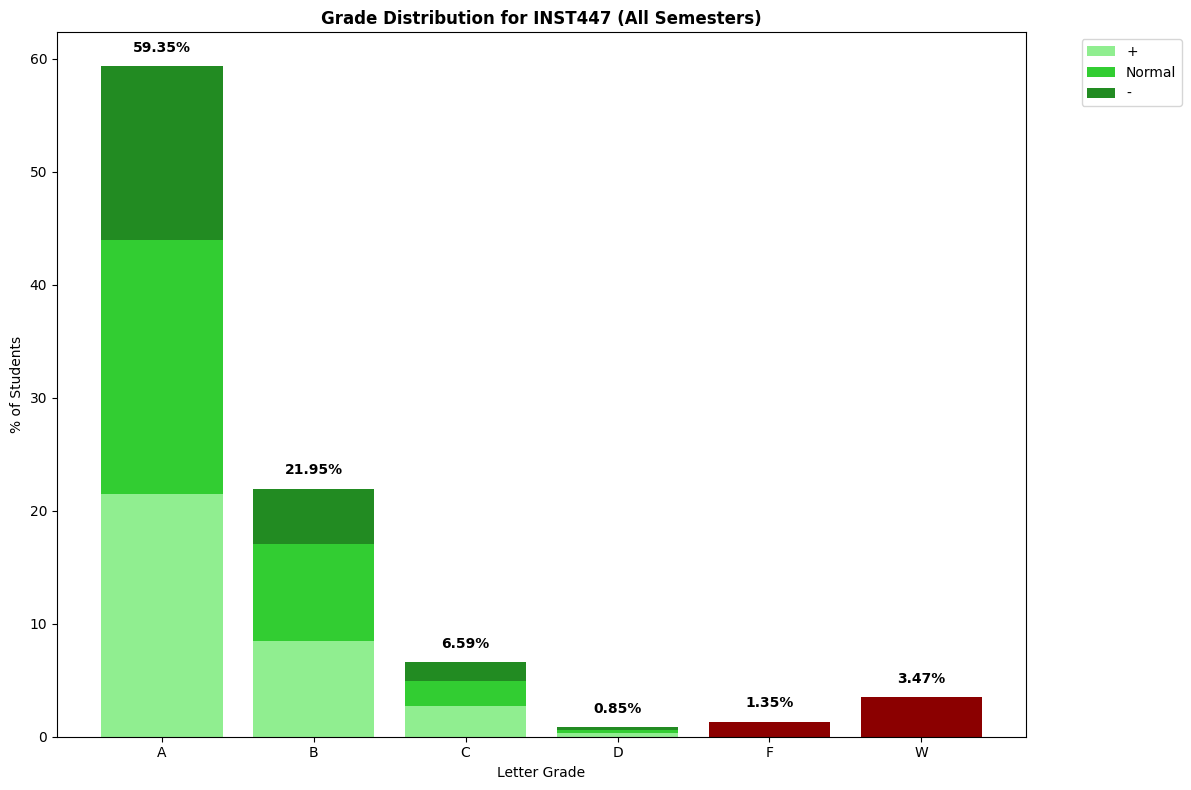

In [93]:
# YOUR CODE HERE

grades_endpoint = f"{base_url}/grades"
params = {
    'course': 'INST447'
}

try:
    response = requests.get(grades_endpoint, params=params)
    
    if response.status_code == 200: # ok response query after requesting data from API
        all_grade_data = response.json() # parsing out JSON response 
        
        if not all_grade_data:
            print("No grade data available for INST447")
        else:
            # aggregate grades across all sections and semesters
            grade_counts = {}
            total_students = 0
            
            for section in all_grade_data: # iterate through each section in grade data
                for grade, count in section.items(): # iterate through each key-value pair in section dict
                    if grade not in ['course', 'professor', 'section', 'semester', 'year']: # filtering out fields not associated with grade counts
                        grade_counts[grade] = grade_counts.get(grade, 0) + count # get count if it exists (else 0) and add it to the current count before updating dict total
                        total_students += count # add grade count to the total number of students 
            
            print(f"Total students across all semesters: {total_students}")
            print(f"Grade distribution: {grade_counts}")
            
            # grade groups and colors 
            grade_groups = {
                'A': ['A+', 'A', 'A-'],
                'B': ['B+', 'B', 'B-'], 
                'C': ['C+', 'C', 'C-'],
                'D': ['D+', 'D', 'D-'],
                'F': ['F'],
                'W': ['W']  
            }
            
            colors = {
                'A+': '#90EE90',  # Light green
                'A': '#32CD32',   # Lime green
                'A-': '#228B22',  # Forest green
                
                'B+': '#90EE90',  
                'B': '#32CD32',   
                'B-': '#228B22',  
                
                'C+': '#90EE90',  
                'C': '#32CD32',   
                'C-': '#228B22',  
                
                'D+': '#90EE90',  
                'D': '#32CD32',   
                'D-': '#228B22',  
                
                'F': '#8B0000',   # Dark red
                'W': '#8B0000',   
            }
            
            # percentages for each grade
            grade_percentages = {}
            for grade, count in grade_counts.items():
                grade_percentages[grade] = (count / total_students) * 100
            
            # visualization
            fig, ax = plt.subplots(figsize=(12, 8))
            
            # bars
            bar_width = 0.8
            letter_grades = list(grade_groups.keys())
            x_position_ticks = np.arange(len(letter_grades))
            
            # stack bar plot for the +/- grades within each letter grade
            bottom = np.zeros(len(letter_grades))
            
            for elem, letter_grade in enumerate(letter_grades): # loop through each letter grade category 
                sub_grades = grade_groups[letter_grade] # sub grades extracted from letter grade (+/-/regular)
                
                for sub_grade in sub_grades: # loop through each sub grade
                    if sub_grade in grade_percentages: 
                        percentage = grade_percentages[sub_grade] # percentage value for sub grade given that it exists
                        ax.bar(elem, percentage, bar_width, # letter grade category for percent height and bar width
                              bottom=bottom[elem], # stack segment at bottom based on letter grades
                              color=colors.get(sub_grade), # map colors to sub grades
                              label=sub_grade if elem == 0 else "")
                        bottom[elem] += percentage # update for each sub grade (builds on previous one)
            
       
            ax.set_xlabel('Letter Grade')
            ax.set_ylabel('% of Students')
            ax.set_title('Grade Distribution for INST447 (All Semesters)', fontweight='bold')
            
            ax.set_xticks(x_position_ticks) # where they're placed in space (how)
            ax.set_xticklabels(letter_grades) # labeling for ticks
            
            # legend
            ax.legend(['+', 'Normal', '-'], bbox_to_anchor=(1.05, 1), loc='upper left')
            
            # value labels on bars
            for element, letter_grade in enumerate(letter_grades): # loop through each letter grade category again
                total_percent = sum(grade_percentages.get(g, 0) for g in grade_groups[letter_grade]) # calculate total percent by accumulating subgrade percentages (g) if they exist and summing them
                if total_percent > 0:
                    ax.text(element, total_percent + 1, f'{total_percent:.2f}%', # place percent over each element (bar) 1 position (+1) over the y
                           ha='center', va='bottom', fontweight='bold') # centered and aligned toward the bottom in bold
            
            plt.tight_layout()
            plt.savefig('inst447_grades.png', bbox_inches='tight')
            plt.show()
            
        
    else:
        print(f"API request failed: {response.status_code}")
        print(f"Response: {response.text}")
        
except Exception as e:
    print(f"Error!: {e}")

---

## Question 6: AI Assistant Reflection (10 points)

**If you used AI assistants (ChatGPT, Claude, Copilot, etc.):**
- Which questions did you use AI for?
- What prompts or questions did you ask the AI?
- How did you verify the correctness of AI-generated code?
- What did you learn from using AI for this assignment?
- Did the AI give any incorrect or confusing answers? How did you handle that?

**If you did NOT use AI:**
- What was your approach to solving the problems?
- What resources did you use (documentation, Stack Overflow, etc.)?
- Looking back, where might AI have been helpful?
- Why did you choose not to use AI?

**Please structure your answer as 2-3 paragraphs.**

_This is the **ONLY** question where you should **NOT** use AI to write your response._

**Your Reflection:**

For this assignment, AI was used as a means for understanding how the approaches to certain problems might work rather than genuine replacement for the thinking process regarding whatever I was struggling with. This meant that the learning was still taking place even in times where I ran into problems with my code that I needed to debug. For instance, during question 2's JSON flattening, I wanted more of an in-depth explanation for the 'json_normalize' method, and therefore asked AI to provide examples of how to use the parameters within the method for my specific use case in the problem. In doing this, I was able to grasp the conceptual procedures behind a nested list and what exactly happens when the observations are placed with the parent fields that are preserved in the new data frame. In addition, for questions like number 4, AI was able to help me structure my response with proper API etiquette that could handle status code errors and sequential requeests with time.sleep delays between calls as necessary. The nested nature of the section and grade data that was within the API also would've been quite difficult to sort through without AI's help, as I needed to understand how to access a student's information on every necessary level. In incrementally testing the AI's output with different parameters and API endpoints, I was able to verify that what I was receiving was correct alongside manual calculation or documentation. I also learned a lot of valuable data vizualization tools for python in visiting the PlanetTerp site for information on how they establish the output for their own charts. When querying this information, I parsed out what was useful from the particularly complex solutions and cross-referenced it with what I believed to be simpler approaches to the issue. 

---

## Submission Instructions

Congratulations on finishing Assignment 03! **Please follow these instructions to submit your work:**

1. **Restart and rerun the entire notebook:**
   - Jupyter Notebook: Click "Kernel" → "Restart & Run All"
   - Google Colab: Click "Runtime" → "Restart and run all"
   - This ensures your code runs without errors and results are reproducible

2. **Verify your information:**
   - Make sure your name and UID in the first cell are correct
   - If you received help from anyone, please list them in the first cell

3. **Check outputs:**
   - Make sure all code cells have executed
   - Verify your visualization (Question 5) displays correctly
   - Confirm you have written your reflection (Question 6)

4. **Download and submit:**
   - Jupyter Notebook: File → Download as → Notebook (.ipynb)
   - Google Colab: File → Download → Download .ipynb
   - **Submit the `.ipynb` file to ELMS**
   - You only need to submit the `.ipynb` file (not the JSON or PNG files)

### Submission Checklist
- [ ] All code cells run without errors
- [ ] All questions answered with correct output
- [ ] Visualization (Question 5) displays correctly in notebook
- [ ] Name and UID filled in at top
- [ ] Reflection (Question 6) completed in your own words
- [ ] Used `time.sleep()` in Question 4
- [ ] Notebook restarts and runs all without errors

Good luck!